In [1]:
# importing the libraries required
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten,Dropout,Dense,Conv2D,MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Loading and Splitting the data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

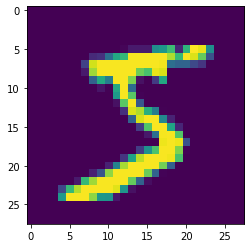

5


(60000, 28, 28) (60000,)


(10000, 28, 28) (10000,)


In [3]:
#printing the shape of the training data
plt.imshow(x_train[0])
#print(x_train[0])
plt.show()
print(y_train[0])
print("\n")
print(x_train.shape,y_train.shape)
print("\n")
print(x_test.shape,y_test.shape)


In [4]:
# normalising and one hot encoding
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
# building the model
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [7]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [8]:
# Training the model
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2494 - accuracy: 0.9211 - val_loss: 0.0487 - val_accuracy: 0.9835
Epoch 2/3
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1032 - accuracy: 0.9688 - val_loss: 0.0348 - val_accuracy: 0.9879
Epoch 3/3
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0785 - accuracy: 0.9759 - val_loss: 0.0321 - val_accuracy: 0.9887


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2


--------- Prediction --------- 



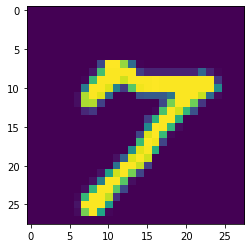


Final Output: 7


In [11]:
# predicting on the test data
example = x_test[9000]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("\n--------- Prediction --------- \n")
plt.imshow(example.reshape(28, 28))
plt.show()
print("\nFinal Output: {}".format(np.argmax(prediction)))

In [12]:
model.save("mnist_handwritten.h5")
print("model saved!")

model saved!
